## Importing the Libraries

In [ ]:
# Importing required dependencies
!pip install xgboost

import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Heart Disease Dataset
#### *Heart Disease Download Link: [Download](https://github.com/niloyahsan1/Heart-Disease-Prediction-ML-Project/blob/main/Heart_Disease_Dataset.csv)*

## Load Dataset

In [ ]:
# from google.colab import files
# diabetes_dataset = files.upload()

In [ ]:
# Reading the dataset from GitHub Repo
dataset_URL = 'https://raw.githubusercontent.com/niloyahsan1/Heart-Disease-Prediction-ML-Project/main/Heart_Disease_Dataset.csv'

df = pd.read_csv(dataset_URL)

## Data Visualization and Preprocessing

In [ ]:
# Printing the first 10 rows of the dataset
df.head(20)

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [ ]:
# Counting the number of rows and columns
print('Number of Rows and Columns:')
df.shape

Number of Rows and Columns:


(4240, 16)

In [ ]:
# Checking informations of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            4240 non-null   object 
 1   age                               4240 non-null   int64  
 2   education                         4135 non-null   float64
 3   currentSmoker                     4240 non-null   int64  
 4   cigsPerDay                        4211 non-null   float64
 5   BPMeds                            4187 non-null   float64
 6   prevalentStroke                   4240 non-null   int64  
 7   prevalentHyp                      4240 non-null   int64  
 8   diabetes                          4240 non-null   int64  
 9   totChol                           4190 non-null   float64
 10  sysBP                             4240 non-null   float64
 11  diaBP                             4240 non-null   float64
 12  BMI   

In [ ]:
# Checking for the non-numeric columns
cols = list(df.columns)
to_one_hot = []

for i in cols:
    if type(df[i].iloc[0]) == str:
        to_one_hot.append(i)

print('Colums with Catagorical values --->', to_one_hot)

Colums with Catagorical values ---> ['gender']


In [ ]:
# Checking the unique values of this a particular column
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# Converting non-numeric columns to numeric using one-hot encoding
to_one_hot = df.select_dtypes(include = ['object']).columns
df = pd.get_dummies(df, columns = to_one_hot, dtype=int)

In [ ]:
# Again checking for the non-numeric columns
cols = list(df.columns)
to_one_hot = []

for i in cols:
    if type(df[i].iloc[0]) == str:
        to_one_hot.append(i)

print('Colums with Catagorical values --->', to_one_hot)

Colums with Catagorical values ---> []


In [ ]:
# Checking description of the dataset
df.describe()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years),gender_Female,gender_Male
count,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000,4240.000000,4240.000000
mean,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887,0.570755,0.429245
std,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953,0.495027,0.495027
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000,0.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000,1.000000,0.000000
75%,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000,1.000000,1.000000
max,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000,1.000000


In [ ]:
# Checking null values if any
df.isnull().sum()

,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [ ]:
# Calculating the Median
median = df['education'].median()
print('The median is =', median)

# Imputing mean values in the NULL columns
new_value = SimpleImputer(strategy='median')
df['education'] = new_value.fit_transform(df[['education']])

The median is = 2.0


In [ ]:
# Calculating the Median
median = df['cigsPerDay'].median()
print('The median is =', median)

# Imputing mean values in the NULL columns
new_value = SimpleImputer(strategy='median')
df['cigsPerDay'] = new_value.fit_transform(df[['cigsPerDay']])

The median is = 0.0


In [ ]:
# Calculating the Median
median = df['BPMeds'].median()
print('The median is =', median)

# Imputing mean values in the NULL columns
new_value = SimpleImputer(strategy='median')
df['BPMeds'] = new_value.fit_transform(df[['BPMeds']])

The median is = 0.0


In [ ]:
# Calculating the Median
median = df['totChol'].median()
print('The median is =', median)

# Imputing mean values in the NULL columns
new_value = SimpleImputer(strategy='median')
df['totChol'] = new_value.fit_transform(df[['totChol']])

The median is = 234.0


In [ ]:
# Calculating the Median
median = df['BMI'].median()
print('The median is =', median)

# Imputing mean values in the NULL columns
new_value = SimpleImputer(strategy='median')
df['BMI'] = new_value.fit_transform(df[['BMI']])

The median is = 25.4


In [ ]:
# Calculating the Median
median = df['heartRate'].median()
print('The median is =', median)

# Imputing mean values in the NULL columns
new_value = SimpleImputer(strategy='median')
df['heartRate'] = new_value.fit_transform(df[['heartRate']])

The median is = 75.0


In [ ]:
# Calculating the Median
median = df['glucose'].median()
print('The median is =', median)

# Imputing mean values in the NULL columns
new_value = SimpleImputer(strategy='median')
df['glucose'] = new_value.fit_transform(df[['glucose']])

The median is = 78.0


In [ ]:
# Again checking null values if any
df.isnull().sum()

,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [ ]:
# Counting the values of the target column
df['Heart Disease (in next 10 years)'].value_counts()

,count
Heart Disease (in next 10 years),
0,3596
1,644


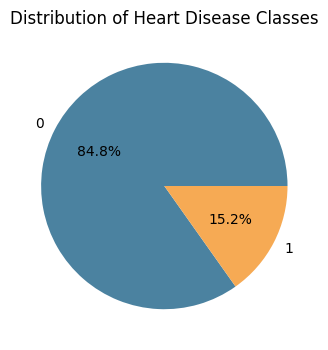

In [ ]:
# Representing N classes using a Bar Chart
category_counts = df['Heart Disease (in next 10 years)'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['#4b82a0', '#f6aa54'])
plt.title('Distribution of Heart Disease Classes')

plt.show()

In [ ]:
# Calculating the correlation matrix
df_correlation = df.corr()
df_correlation

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years),gender_Female,gender_Male
age,1.000000,-0.164016,-0.213662,-0.192017,0.121011,0.057679,0.306799,0.101314,0.260527,0.394053,0.205586,0.135470,-0.012868,0.117878,0.225408,0.029014,-0.029014
education,-0.164016,1.000000,0.018270,0.007856,-0.010445,-0.035178,-0.080780,-0.038204,-0.022851,-0.128139,-0.061326,-0.135744,-0.053658,-0.034090,-0.053570,-0.017265,0.017265
currentSmoker,-0.213662,0.018270,1.000000,0.760326,-0.048348,-0.032980,-0.103710,-0.044285,-0.046391,-0.130281,-0.107933,-0.167368,0.062661,-0.055082,0.019448,-0.197026,0.197026
cigsPerDay,-0.192017,0.007856,0.760326,1.000000,-0.044697,-0.032248,-0.065541,-0.036173,-0.027134,-0.088393,-0.056768,-0.092647,0.074258,-0.056792,0.058729,-0.314849,0.314849
BPMeds,0.121011,-0.010445,-0.048348,-0.044697,1.000000,0.114614,0.258580,0.051407,0.078642,0.251479,0.192254,0.099617,0.015139,0.049142,0.086448,0.051544,-0.051544
prevalentStroke,0.057679,-0.035178,-0.032980,-0.032248,0.114614,1.000000,0.074791,0.006955,0.000160,0.057000,0.045153,0.024283,-0.017672,0.018730,0.061823,0.004550,-0.004550
prevalentHyp,0.306799,-0.080780,-0.103710,-0.065541,0.258580,0.074791,1.000000,0.077752,0.162696,0.696656,0.615840,0.300537,0.146751,0.083406,0.177458,-0.005853,0.005853
diabetes,0.101314,-0.038204,-0.044285,-0.036173,0.051407,0.006955,0.077752,1.000000,0.040186,0.111265,0.050260,0.086058,0.048989,0.606495,0.097344,-0.015693,0.015693
totChol,0.260527,-0.022851,-0.046391,-0.027134,0.078642,0.000160,0.162696,0.040186,1.000000,0.207350,0.163408,0.115035,0.090541,0.045677,0.081749,0.069643,-0.069643
sysBP,0.394053,-0.128139,-0.130281,-0.088393,0.251479,0.057000,0.696656,0.111265,0.207350,1.000000,0.783952,0.325087,0.182052,0.135091,0.216374,0.035879,-0.035879


In [ ]:
target = df_correlation['Heart Disease (in next 10 years)']
target

,Heart Disease (in next 10 years)
age,0.225408
education,-0.053570
currentSmoker,0.019448
cigsPerDay,0.058729
BPMeds,0.086448
prevalentStroke,0.061823
prevalentHyp,0.177458
diabetes,0.097344
totChol,0.081749
sysBP,0.216374


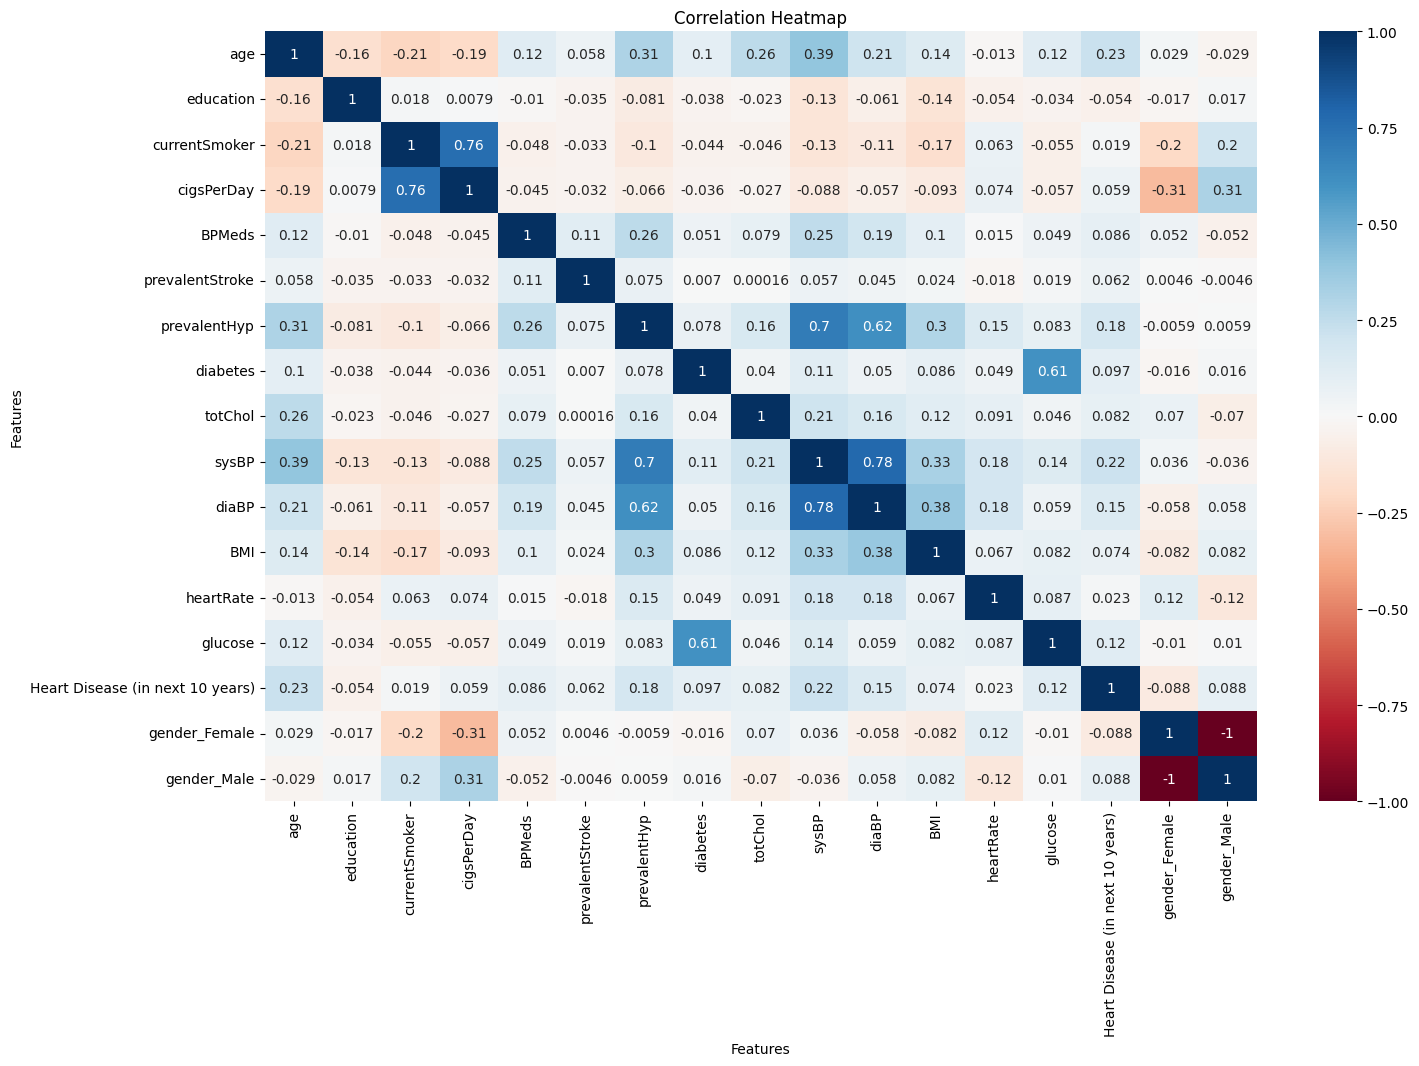

In [ ]:
# Generating a heatmap for visualization of the correlation matrix
plt.figure(figsize=(16, 10))

sns.heatmap(df_correlation, cmap = 'RdBu', annot = True)

plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Showing total number of columns
df.shape[1]

17

In [ ]:
# Showing the columns
df.columns

Index(['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose',
       'Heart Disease (in next 10 years)', 'gender_Female', 'gender_Male'],
      dtype='object')

In [ ]:
# Dropping the unnesassary columns
df = df.drop(['gender_Female'], axis = 1)

In [ ]:
# Shape of the dataset
df.shape

(4240, 16)

In [ ]:
# Separating the Data and Labels
X = df.drop(columns = 'Heart Disease (in next 10 years)', axis = 1)  # Saving the features
Y = df['Heart Disease (in next 10 years)']   # Saving the labels

In [ ]:
print('Features:\n', X)
print('-----------------------------------------------------------')
print('Label:\n', Y)

Features:
       age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0      39        4.0              0         0.0     0.0                0   
1      46        2.0              0         0.0     0.0                0   
2      48        1.0              1        20.0     0.0                0   
3      61        3.0              1        30.0     0.0                0   
4      46        3.0              1        23.0     0.0                0   
...   ...        ...            ...         ...     ...              ...   
4235   48        2.0              1        20.0     0.0                0   
4236   44        1.0              1        15.0     0.0                0   
4237   52        2.0              0         0.0     0.0                0   
4238   40        3.0              0         0.0     0.0                0   
4239   39        3.0              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0  

## Splitting the Train and the Test into **80:20** Ratio

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size = 0.2, random_state = 42)

In [ ]:
print('Original Data Shape --->', X.shape)
print('Training Data Shape --->', X_train.shape)
print('Test Data Shape ------->', X_test.shape)

Original Data Shape ---> (4240, 15)
Training Data Shape ---> (3392, 15)
Test Data Shape -------> (848, 15)


In [ ]:
# Apply SMOTE to training data only
smote = SMOTE(random_state = 42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [ ]:
print('Training Data Shape --->', X_train_resampled.shape)

Training Data Shape ---> (5754, 15)


In [ ]:
# Counting the values of the label column
df['Heart Disease (in next 10 years)'].value_counts()

,count
Heart Disease (in next 10 years),
0,3596
1,644


In [ ]:
# Checking Heart Disease frequency in training values
Y_train_resampled.value_counts()

,count
Heart Disease (in next 10 years),
0,2877
1,2877


In [ ]:
# Checking Heart Disease frequency in test values
Y_test.value_counts()

,count
Heart Disease (in next 10 years),
0,719
1,129


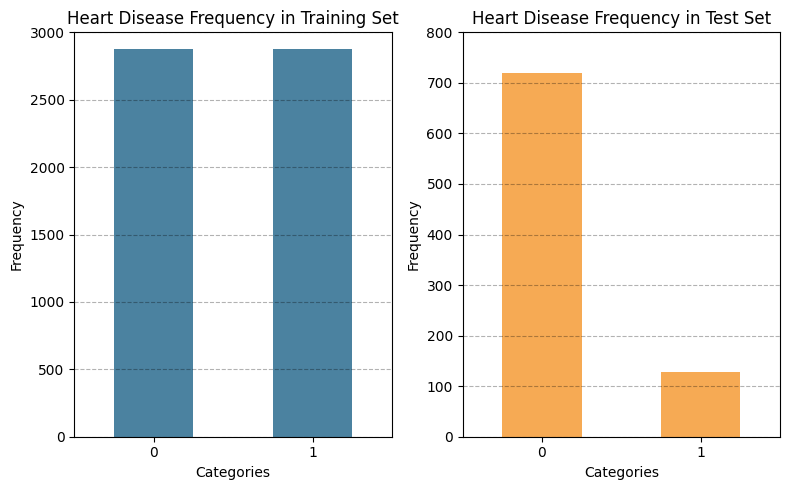

In [ ]:
train_frequency_count = Y_train_resampled.value_counts()
test_frequency_count = Y_test.value_counts()

fig = plt.figure(figsize=(8, 5))

# Defining Sub Plots
axes = fig.subplots(nrows=1, ncols=2)

# Representing Heart Disease frequency in training values
train_frequency_count.plot(kind='bar', color='#4b82a0', ax=axes[0])
axes[0].set_title('Heart Disease Frequency in Training Set')
axes[0].set_xlabel('Categories')
axes[0].set_ylabel('Frequency')
axes[0].set_ylim(0, 3000)
axes[0].set_xticklabels(train_frequency_count.index, rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.3, color='black')

# Representing Heart Disease frequency in test values
test_frequency_count.plot(kind='bar', color='#f6aa54', ax=axes[1])
axes[1].set_title('Heart Disease Frequency in Test Set')
axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Frequency')
axes[1].set_ylim(0, 800)
axes[1].set_xticklabels(test_frequency_count.index, rotation=0)
axes[1].grid(axis='y', linestyle='--', alpha=0.3, color='black')


plt.tight_layout()
plt.show()

## Checking accuracy before Feature Scaling for models like:
1. Decision Trees
2. Random Forest
3. XGBoost

### Training the Models

#### Decision Tree:
---

In [ ]:
# Trainning the model
depth = 10
split = 8
leaf = 4

dt_model = DecisionTreeClassifier(max_depth = depth,
                                  min_samples_split = split,
                                  min_samples_leaf = leaf)
dt_model.fit(X_train_resampled, Y_train_resampled)

# Predicting on original test data
Y_pred_dt = dt_model.predict(X_test)

# Checking accuracy
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)

print(f'Test Data Accuracy (DT) ----> {accuracy_dt * 100:.2f}%')

Test Data Accuracy (DT) ----> 74.29%


In [ ]:
# Generating confusion matrix
print(f'Confusion Matrix (DT):\n\n{confusion_matrix(Y_test, Y_pred_dt)}')

Confusion Matrix (DT):

[[601 118]
 [100  29]]


In [ ]:
# Generating classification report
print(f'Classification Report (DT):\n\n{classification_report(Y_test, Y_pred_dt)}')

Classification Report (DT):

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       719
           1       0.20      0.22      0.21       129

    accuracy                           0.74       848
   macro avg       0.53      0.53      0.53       848
weighted avg       0.76      0.74      0.75       848



#### Random Forest:
---

In [ ]:
# Trainning the model
n = 100
depth = 12
split = 7
leaf = 4

rf_model = RandomForestClassifier(n_estimators = n,
                                  max_depth = depth,
                                  min_samples_split = split,
                                  min_samples_leaf = leaf)
rf_model.fit(X_train_resampled, Y_train_resampled)

# Predicting on original test data
Y_pred_rf = rf_model.predict(X_test)

# Checking accuracy
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)

print(f'Test Data Accuracy (RF) ----> {accuracy_rf * 100:.2f}%')

Test Data Accuracy (RF) ----> 78.89%


In [ ]:
# Generating confusion matrix
print(f'Confusion Matrix (RF):\n\n{confusion_matrix(Y_test, Y_pred_rf)}')

Confusion Matrix (RF):

[[643  76]
 [103  26]]


In [ ]:
# Generating classification report
print(f'Classification Report (RF):\n\n{classification_report(Y_test, Y_pred_rf)}')

Classification Report (RF):

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       719
           1       0.25      0.20      0.23       129

    accuracy                           0.79       848
   macro avg       0.56      0.55      0.55       848
weighted avg       0.77      0.79      0.78       848



#### XGBoost:
---

In [ ]:
# Trainning the model
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', max_depth = 2, learning_rate = 0.1)
xgb_model.fit(X_train_resampled, Y_train_resampled)

# Predicting on original test data
Y_pred_xgb = xgb_model.predict(X_test)

# Checking accuracy
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)

print(f'Test Data Accuracy(XGB) ----> {accuracy_xgb * 100:.2f}%')

Test Data Accuracy(XGB) ----> 80.66%


In [ ]:
# Generating confusion matrix
print(f'Confusion Matrix (XGB):\n\n{confusion_matrix(Y_test, Y_pred_xgb)}')

Confusion Matrix (XGB):

[[654  65]
 [ 99  30]]


In [ ]:
# Generating classification report
print(f'Classification Report (XGB):\n\n{classification_report(Y_test, Y_pred_xgb)}')

Classification Report (XGB):

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       719
           1       0.32      0.23      0.27       129

    accuracy                           0.81       848
   macro avg       0.59      0.57      0.58       848
weighted avg       0.78      0.81      0.79       848



## Checking accuracy after Feature Scaling for models like:
1. k-Nearest Neighbors
2. Support Vector Machine
3. Logistic Regression

### Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

### Training the Models

#### k-Nearest Neighbors:
---

In [ ]:
# Trainning the model
best_accuracy = 0
best_k = 0

for i in range(1, 100, 1):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train_scaled, Y_train_resampled)

    # Predicting on original test data
    Y_pred_knn = knn_model.predict(X_test_scaled)

    # Checking accuracy
    accuracy_knn = accuracy_score(Y_test, Y_pred_knn)

    if (accuracy_knn > best_accuracy):
        best_accuracy = accuracy_knn
        best_k = i

accuracy_knn = best_accuracy

print(f'Best k value: {best_k}')
print(f'Test Data Accuracy (KNN) ----> {accuracy_knn * 100:.2f}%')

Best k value: 2
Test Data Accuracy (KNN) ----> 74.17%


In [ ]:
# Generating confusion matrix
print(f'Confusion Matrix (KNN):\n\n{confusion_matrix(Y_test, Y_pred_knn)}')

Confusion Matrix (KNN):

[[435 284]
 [ 59  70]]


In [ ]:
# Generating classification report
print(f'Classification Report (KNN):\n\n{classification_report(Y_test, Y_pred_knn)}')

Classification Report (KNN):

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       719
           1       0.20      0.54      0.29       129

    accuracy                           0.60       848
   macro avg       0.54      0.57      0.50       848
weighted avg       0.78      0.60      0.65       848



#### Support Vector Machine:
---

In [ ]:
# Trainning the model
best_accuracy = 0
best_kernel = ''
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for i in kernels:
    svm_model = SVC(kernel = i, C=10)
    svm_model.fit(X_train_scaled, Y_train_resampled)

    # Predicting on original test data
    Y_pred_svm = svm_model.predict(X_test_scaled)

    # Checking accuracy
    accuracy_svm = accuracy_score(Y_test, Y_pred_svm)

    if (accuracy_svm > best_accuracy):
        best_accuracy = accuracy_svm
        best_kernel = i

accuracy_svm = best_accuracy

print(f'Best Kernel: {best_kernel}')
print(f'Test Data Accuracy (SVM) ----> {accuracy_svm * 100:.2f}%')

Best Kernel: rbf
Test Data Accuracy (SVM) ----> 71.34%


In [ ]:
# Generating confusion matrix
print(f'Confusion Matrix (SVM):\n\n{confusion_matrix(Y_test, Y_pred_svm)}')

Confusion Matrix (SVM):

[[411 308]
 [ 70  59]]


In [ ]:
# Generating classification report
print(f'Classification Report (SVM):\n\n{classification_report(Y_test, Y_pred_svm)}')

Classification Report (SVM):

              precision    recall  f1-score   support

           0       0.85      0.57      0.69       719
           1       0.16      0.46      0.24       129

    accuracy                           0.55       848
   macro avg       0.51      0.51      0.46       848
weighted avg       0.75      0.55      0.62       848



#### Logistic Regression:
---

In [ ]:
# Trainning the model
lr_model = LogisticRegression(max_iter = 1000, C = 10)
lr_model.fit(X_train_scaled, Y_train_resampled)

# Predicting on original test data
Y_pred_lr = lr_model.predict(X_test_scaled)

# Checking accuracy
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)

print(f'Test Data Accuracy (LR) ----> {accuracy_lr * 100:.2f}%')

Test Data Accuracy (LR) ----> 66.27%


In [ ]:
# Generating confusion matrix
print(f'Confusion Matrix (LR):\n\n{confusion_matrix(Y_test, Y_pred_lr)}')

Confusion Matrix (LR):

[[499 220]
 [ 66  63]]


In [ ]:
# Generating classification report
print(f'Classification Report (LR):\n\n{classification_report(Y_test, Y_pred_lr)}')

Classification Report (LR):

              precision    recall  f1-score   support

           0       0.88      0.69      0.78       719
           1       0.22      0.49      0.31       129

    accuracy                           0.66       848
   macro avg       0.55      0.59      0.54       848
weighted avg       0.78      0.66      0.71       848



## Visualizing the Prediction Accuracy using Bar Chart

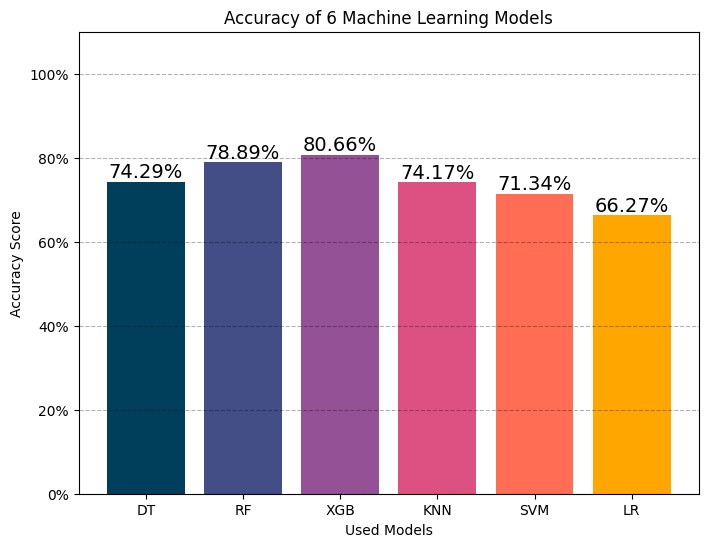

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Your current code
used_models = ['DT', 'RF', 'XGB', 'KNN', 'SVM', 'LR']
accuracies = [accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_knn, accuracy_svm, accuracy_lr]
colors = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']

plt.figure(figsize=(8, 6))
bars = plt.bar(used_models, accuracies, color=colors)

# Adding percentages on top of bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.2%}', ha='center', color='black', fontsize=14)

plt.title('Accuracy of 6 Machine Learning Models')
plt.xlabel('Used Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1.1)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.grid(axis='y', linestyle='--', alpha=0.3, color='black')

plt.show()
